In [1]:
import random
import numpy as np
import seaborn as sns
import math
import os
import time
import multiprocessing
from decimal import Decimal
import matplotlib.pyplot as plt
import traceback
import pandas as pd
from scipy.stats import multivariate_normal
from scipy.stats import norm, entropy
#from select_sensor import SelectSensor
from sensor import Sensor
from joblib import Memory, Parallel, delayed
%matplotlib inline

In [2]:
selectsensor = SelectSensor('config.json')

selectsensor.read_init_sensor('data/sensor.txt')
selectsensor.read_mean_std('data/mean_std.txt')
selectsensor.compute_multivariant_gaussian('data/artificial_samples.csv')

start = time.time()
selectsensor.select_offline_greedy_p(10, 4)
print('time elapsed:', time.time()-start)

Computed covariance!
[0] -14.2032423517
[1] -11.5213106168
[2] -6.6724615458
[3] -13.6821174371
[4] -20.5816916792
[5] -35.4891919175
[6] -21.9446023032
[7] -15.2654842091
[8] -13.1892678247
[9] -25.8192730129
[10] -19.533449786
[11] -24.9268760163
[12] -12.6913962135
[13] -10.5013991963
[14] -18.5031769155
[15] -24.2404420283
[16] -21.0787282228
[17] -22.4142194873
[18] -28.21042437
[19] -12.6367895029
[20] -12.6234541688
[21] -11.4290844874
[22] -22.3989552752
[23] -35.2956124381
[0, 2] -0.0827980640277
[1, 2] 0.174193188436
[2, 3] -0.00267052202267
[2, 4] -0.320017048905
[2, 5] -3.5299461897
[2, 6] -1.60521112754
[2, 7] -0.166800604652
[2, 8] -0.46939172652
[2, 9] -1.26633683764
[2, 10] -1.21846571406
[2, 11] -0.985800427099
[2, 12] -0.354501346054
[2, 13] -2.28980045928
[2, 14] -0.232845002992
[2, 15] -2.23036210145
[2, 16] -0.618276473527
[2, 17] -1.11488833727
[2, 18] -0.761529498081
[2, 19] -2.03961960396
[2, 20] -1.61484492609
[2, 21] -0.382559566714
[2, 22] -0.378791472224
[2,

In [4]:
selectsensor = SelectSensor('config.json')

selectsensor.read_init_sensor('data/sensor.txt')
selectsensor.read_mean_std('data/mean_std.txt')
selectsensor.compute_multivariant_gaussian('data/artificial_samples.csv')

start = time.time()
selectsensor.select_offline_greedy_p(10, 4)
print('time elapsed:', time.time()-start)

Computed covariance!
[0] -14.2032423517
[1] -11.5213106168
[2] -6.6724615458
[3] -13.6821174371
[4] -20.5816916792
[5] -35.4891919175
[6] -21.9446023032
[7] -15.2654842091
[8] -13.1892678247
[9] -25.8192730129
[10] -19.533449786
[11] -24.9268760163
[12] -12.6913962135
[13] -10.5013991963
[14] -18.5031769155
[15] -24.2404420283
[16] -21.0787282228
[17] -22.4142194873
[18] -28.21042437
[19] -12.6367895029
[20] -12.6234541688
[21] -11.4290844874
[22] -22.3989552752
[23] -35.2956124381
[0, 2] -0.0827980640277
[1, 2] 0.174193188436
[2, 3] -0.00267052202267
[2, 4] -0.320017048905
[2, 5] -3.5299461897
[2, 6] -1.60521112754
[2, 7] -0.166800604652
[2, 8] -0.46939172652
[2, 9] -1.26633683764
[2, 10] -1.21846571406
[2, 11] -0.985800427099
[2, 12] -0.354501346054
[2, 13] -2.28980045928
[2, 14] -0.232845002992
[2, 15] -2.23036210145
[2, 16] -0.618276473527
[2, 17] -1.11488833727
[2, 18] -0.761529498081
[2, 19] -2.03961960396
[2, 20] -1.61484492609
[2, 21] -0.382559566714
[2, 22] -0.378791472224
[2,

In [101]:
#visualize the sensors

sensors = {}
with open('data32/homogeneous/sensors', 'r') as f:
    lines = f.readlines()
    for line in lines:
        line = line.split(' ')
        x, y, std = int(line[0]), int(line[1]), float(line[2])
        sensors[(x, y)] = Sensor(x, y, std)
        
grid = np.zeros((32, 32))
for sensor in sensors:
    x, y = sensor[0], sensor[1]
    grid[x][y] = 1

#sensor_index = 1340
#sensor_index = 1526
sensor_index = 378
x = sensor_index//32
y = sensor_index%32
grid[x][y] = -1

#selected = [0, 1, 2, 3, 4, 6, 7, 15, 19, 23]
#sensor_list = list(selectsensor.sensors)
#for index in selected:
#    sensor = sensor_list[index]
#    grid[sensor[0]][sensor[1]] = -1

In [102]:
x,y

(11, 26)

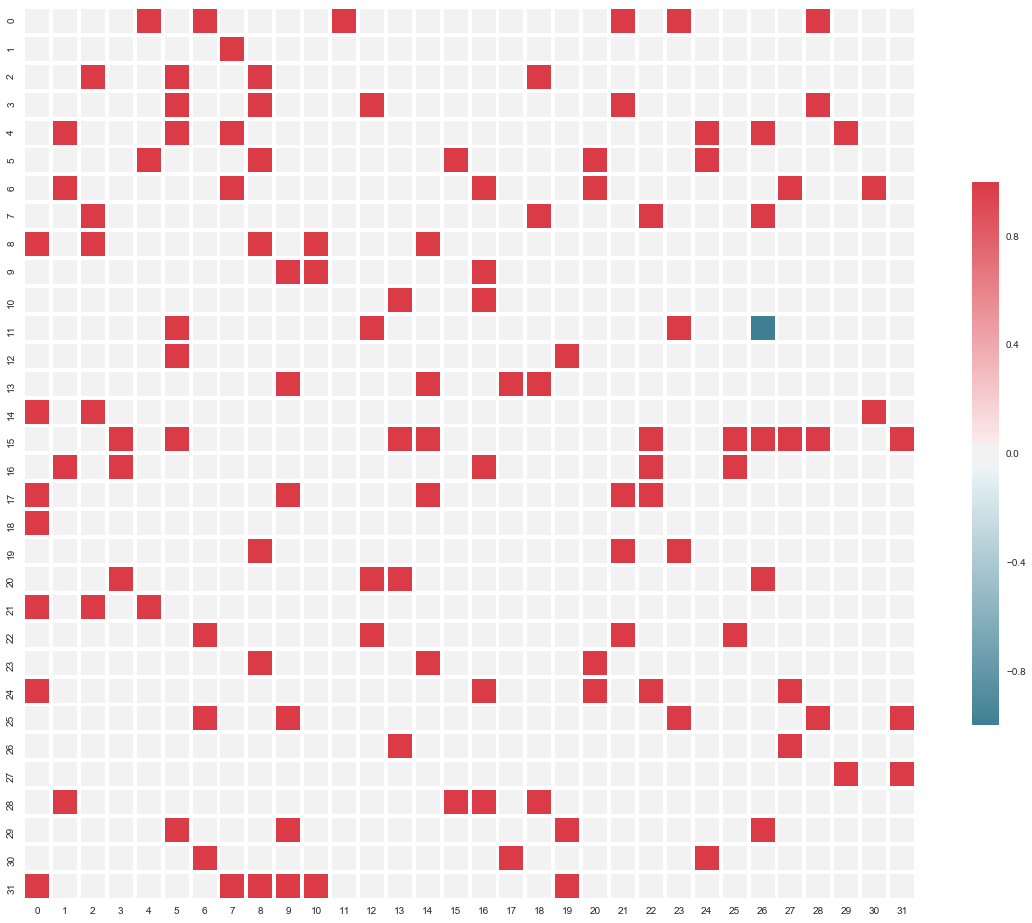

In [100]:
sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(grid, cmap=cmap, vmax=1, center=0,
            square=True, linewidth=3, cbar_kws={"shrink": .5})

plt.show()

In [29]:
# visualize selected and not selected sensors

sensors = {}
with open('data/sensor.txt', 'r') as f:
    lines = f.readlines()
    for line in lines:
        line = line.split(' ')
        x, y, std = int(line[0]), int(line[1]), float(line[2])
        sensors[(x, y)] = Sensor(x, y, std)
        
grid = np.zeros((15, 15))
selected = [0, 3, 6, 8, 9, 12, 15, 17, 18, 19]
i, j = 0, 0
for sensor in sensors:
    x, y = sensor[0], sensor[1]
    if i == selected[j]:
        grid[x][y] = 1
        j += 1
    else:
        grid[x][y] = -1
    i += 1

In [221]:
myconfig = {
    256: 0.388882393442197,
    512: 0.38711563194200865,
    1024: 0.3982618184652559,
    2048: 0.4226197435597646,
    4096: 0.4608519427881055,
    8192: 0.5318082024500825,
    16384: 0.6709536614833002
}

In [ ]:
homo = pd.read_csv('data2/homogeneous/hypothesis', header=None, delimiter=' ')
homo[5] = homo[5].astype(float)
homo

In [267]:
size = len(homo)
homo[5]
for i in range(size):
    config = homo.iloc[i, 5]
    homo.set_value(i, 5, myconfig.get(config))

In [268]:
homo.to_csv('data2/homogeneous/hypothesis', header=False, index=False)

In [ ]:
homo

In [203]:
myconfig.get(256)

0.38887482106213006

In [ ]:
hetero = pd.read_csv('data2/heterogeneous/hypothesis', header=None, delimiter=' ')
hetero[5] = hetero[5].astype(float)
hetero

In [273]:
size = len(hetero)
hetero[5]
for i in range(size):
    config = hetero.iloc[i, 5]
    hetero.set_value(i, 5, myconfig.get(config))

In [274]:
hetero.to_csv('data2/heterogeneous/hypothesis', header=False, index=False)

In [ ]:
subset_to_compute = []
ot_approx = []
with open('plot_data3/ot_approx', 'r') as f:
    lines = f.readlines()
    for line in lines:
        line = line.replace('[', '')
        line = line.replace(']', ',')
        line = line.replace('\n', '')
        line = line.replace(' ', '')
        line = line.split(',')
        size = len(line)
        subset = []
        for i in range(size-1):
            index = int(line[i])
            subset.append(index)
        ot_approx.append(line[size-1])
        subset_to_compute.append(subset)
print(subset_to_compute)
print(ot_approx)

In [263]:
num = [i for i in range(1, len(ot_approx)+1)]
ot_a = pd.DataFrame(np.array([num, ot_approx]).T)

In [265]:
ot_a.to_csv('plot_data3/ot_approx.csv', index=False, header=False)

In [3]:
hypothesis = pd.read_csv('data2/heterogeneous/hypothesis', delimiter=' ', header=None)

In [5]:
dist = hypothesis[4]
dist.count()

4096000

In [6]:
dist[dist<0.0001].count()

2589497

In [12]:
hypothesis

,0,1,2,3,4,5
0,0,0,26,16,2.018247,0.977272
1,0,0,19,57,0.000000,3.174743
2,0,0,18,25,0.000000,0.493154
3,0,0,54,48,0.000000,1.721276
4,0,0,18,45,0.000000,1.244544
5,0,0,33,57,0.000000,1.575726
6,0,0,29,56,0.000000,1.194140
7,0,0,35,28,0.000000,1.575726
8,0,0,36,1,0.000000,2.357461
9,0,0,9,47,0.000000,1.215456


In [11]:
summation = 0
for i in range(1000, 960, -1):
    summation += math.ceil(i/4)
summation

9820

In [7]:
np.random.randn(100).reshape(10, 10)

array([[-0.75097259,  1.06178328,  0.69879581,  1.02510598,  0.66588382,
         0.74305754, -1.05109543, -1.54722358, -0.23815156,  0.74990223],
       [ 0.91436508,  1.1896718 , -0.05209154,  0.99500269,  1.19750661,
         0.06659942, -1.10198553, -0.06601054,  0.36947556,  1.77674548],
       [ 1.03032526,  2.21562251,  0.95840857, -0.47484947, -0.6144497 ,
         0.37397402,  1.51929743, -1.08914025,  1.46281065, -1.33320279],
       [-0.03714762,  0.0750532 , -0.62637999, -0.05816952, -1.01999602,
         0.10186646,  1.22489704, -1.04139381, -0.13005311, -0.11756708],
       [ 1.48621488, -2.4886965 , -0.62508688, -0.20916544,  0.6770299 ,
        -1.39176768, -0.1106538 ,  0.28859379,  0.32112089,  0.48062669],
       [-0.01672552, -0.65560422, -0.98315156, -0.32687988,  0.33004741,
         1.02427564, -0.46790267, -1.49730365,  0.95375838, -1.07260189],
       [ 0.1567999 , -0.48821728,  1.10953997, -1.99187542,  0.38282079,
        -0.81791249, -0.20649651,  0.96839613

In [9]:
np.zeros(100).reshape(10, 10)

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [11]:
def index_to_location(index, grid_len):
    return (index//grid_len, index%grid_len)

In [16]:
index_to_location(250, 16)

(15, 10)

In [2]:
pk = [0.5, 0.5]
entropy(pk, base=2)

1.0

In [3]:
a = np.zeros((50, 1024, 100))

In [8]:
a[1, 2, 1] = 1

In [9]:
a[1, 2]

array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [42]:
X = np.linspace(-5, 7, 101)
X

array([-5.  , -4.88, -4.76, -4.64, -4.52, -4.4 , -4.28, -4.16, -4.04,
       -3.92, -3.8 , -3.68, -3.56, -3.44, -3.32, -3.2 , -3.08, -2.96,
       -2.84, -2.72, -2.6 , -2.48, -2.36, -2.24, -2.12, -2.  , -1.88,
       -1.76, -1.64, -1.52, -1.4 , -1.28, -1.16, -1.04, -0.92, -0.8 ,
       -0.68, -0.56, -0.44, -0.32, -0.2 , -0.08,  0.04,  0.16,  0.28,
        0.4 ,  0.52,  0.64,  0.76,  0.88,  1.  ,  1.12,  1.24,  1.36,
        1.48,  1.6 ,  1.72,  1.84,  1.96,  2.08,  2.2 ,  2.32,  2.44,
        2.56,  2.68,  2.8 ,  2.92,  3.04,  3.16,  3.28,  3.4 ,  3.52,
        3.64,  3.76,  3.88,  4.  ,  4.12,  4.24,  4.36,  4.48,  4.6 ,
        4.72,  4.84,  4.96,  5.08,  5.2 ,  5.32,  5.44,  5.56,  5.68,
        5.8 ,  5.92,  6.04,  6.16,  6.28,  6.4 ,  6.52,  6.64,  6.76,
        6.88,  7.  ])

In [47]:
norm.cdf(X, 1, 2)

array([ 0.0013499 ,  0.00164106,  0.00198838,  0.00240118,  0.00289007,
        0.00346697,  0.0041453 ,  0.00494002,  0.00586774,  0.00694685,
        0.00819754,  0.00964187,  0.01130384,  0.01320938,  0.01538633,
        0.01786442,  0.02067516,  0.02385176,  0.02742895,  0.03144276,
        0.03593032,  0.04092951,  0.04647866,  0.05261614,  0.05937994,
        0.0668072 ,  0.0749337 ,  0.08379332,  0.09341751,  0.10383468,
        0.11506967,  0.12714315,  0.14007109,  0.15386423,  0.16852761,
        0.18406013,  0.20045419,  0.21769544,  0.2357625 ,  0.25462691,
        0.27425312,  0.29459852,  0.3156137 ,  0.33724273,  0.35942357,
        0.38208858,  0.40516513,  0.42857628,  0.45224157,  0.47607782,
        0.5       ,  0.52392218,  0.54775843,  0.57142372,  0.59483487,
        0.61791142,  0.64057643,  0.66275727,  0.6843863 ,  0.70540148,
        0.72574688,  0.74537309,  0.7642375 ,  0.78230456,  0.79954581,
        0.81593987,  0.83147239,  0.84613577,  0.85992891,  0.87

In [44]:
norm.pdf(X, 1, 2)

array([ 0.00221592,  0.00264817,  0.00315336,  0.00374144,  0.00442323,
        0.00521047,  0.00611576,  0.00715255,  0.00833505,  0.00967814,
        0.01119727,  0.01290829,  0.01482729,  0.01697038,  0.01935343,
        0.0219918 ,  0.02490004,  0.02809157,  0.03157828,  0.0353702 ,
        0.03947508,  0.04389804,  0.04864113,  0.05370304,  0.05907865,
        0.0647588 ,  0.07072998,  0.07697414,  0.08346852,  0.09018558,
        0.09709303,  0.1041539 ,  0.11132675,  0.11856598,  0.12582217,
        0.13304262,  0.14017191,  0.14715251,  0.15392563,  0.1604319 ,
        0.1666123 ,  0.172409  ,  0.17776626,  0.18263134,  0.1869553 ,
        0.19069391,  0.19380831,  0.19626574,  0.19804011,  0.19911242,
        0.19947114,  0.19911242,  0.19804011,  0.19626574,  0.19380831,
        0.19069391,  0.1869553 ,  0.18263134,  0.17776626,  0.172409  ,
        0.1666123 ,  0.1604319 ,  0.15392563,  0.14715251,  0.14017191,
        0.13304262,  0.12582217,  0.11856598,  0.11132675,  0.10

In [38]:
multivariate_normal(mean=1, cov=4).pdf(X)

array([ 0.02699548,  0.028669  ,  0.03041832,  0.03224476,  0.03414949,
        0.03613354,  0.03819776,  0.04034285,  0.0425693 ,  0.04487739,
        0.04726719,  0.04973857,  0.05229112,  0.05492421,  0.05763694,
        0.06042813,  0.06329634,  0.06623984,  0.06925659,  0.07234428,
        0.07550026,  0.07872159,  0.08200504,  0.08534702,  0.08874368,
        0.09219082,  0.09568396,  0.0992183 ,  0.10278876,  0.10638996,
        0.11001627,  0.11366175,  0.11732025,  0.12098536,  0.12465045,
        0.1283087 ,  0.13195308,  0.13557642,  0.1391714 ,  0.14273058,
        0.14624643,  0.14971134,  0.15311768,  0.15645778,  0.159724  ,
        0.16290875,  0.16600449,  0.1690038 ,  0.17189937,  0.17468407,
        0.17735095,  0.17989328,  0.18230457,  0.18457861,  0.18670949,
        0.18869161,  0.19051975,  0.19218904,  0.19369501,  0.1950336 ,
        0.1962012 ,  0.19719462,  0.19801116,  0.19864858,  0.19910514,
        0.19937958,  0.19947114,  0.19937958,  0.19910514,  0.19

In [49]:
bin(8)

'0b1000'